# Load the libraries

In [1]:
import numpy  as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load the data-set

In [3]:
df=pd.read_csv("tested.csv")

In [4]:
data=pd.read_csv("tested.csv")

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Manual checking

## Messy data 

**1-** Missing Values in age col **2-** Combine Sib & parch and make a family col **3-** Ticket are in messy form **4-** Missing values in cabin col **5-** Cabin are also  in dirty form **7-** Missing values in Embarked col

# Programatic Checking

### See the basic information of data

In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Check Null & duplicates values

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
data.duplicated().sum()

0

## Now check basic statistic
### Categorical Col

## Conclussion
**1-** Fare col contain the whole family fare
**2-** Extract the Family title in Name col

In [9]:
data.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [10]:
data[data["Name"]=="Braund, Mr. Owen Harris"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [11]:
data[data["Sex"]=="male"]["Sex"].value_counts()

Sex
male    266
Name: count, dtype: int64

In [12]:
data[data["Ticket"]=="347082"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [13]:
data[data["Cabin"]=="B96 B98"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [14]:
data[data["Embarked"]=="S"]["Embarked"].value_counts()

Embarked
S    270
Name: count, dtype: int64

# Num Col

## Conclussion
**Sib sp col contain the Individual fare** 

In [15]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [16]:
print(data[data["Survived"]==1]["Survived"].value_counts()/len(data["Survived"])*100)
print(data[data["Survived"]==0]["Survived"].value_counts()/len(data["Survived"])*100)

Survived
1    36.363636
Name: count, dtype: float64
Survived
0    63.636364
Name: count, dtype: float64


In [17]:
data[data["SibSp"]==8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
188,1080,1,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
360,1252,0,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


In [18]:
data[data["Parch"]==6]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
139,1031,0,3,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.9,NaN,S


In [19]:
data[data["Fare"]==512.329200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
343,1235,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C


# Changing the Data types

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [21]:
for i in data.describe(include="object").columns:
    l=["Sex","Embarked"]
    if i in l:
        data[i]=data[i].astype("category")

In [22]:
data["Pclass"]=data["Pclass"].astype("int16")

In [23]:
data["Survived"]=data["Survived"].astype("int16")

In [24]:
data["PassengerId"]=data["PassengerId"].astype("int16")

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int16   
 1   Survived     418 non-null    int16   
 2   Pclass       418 non-null    int16   
 3   Name         418 non-null    object  
 4   Sex          418 non-null    category
 5   Age          332 non-null    float64 
 6   SibSp        418 non-null    int64   
 7   Parch        418 non-null    int64   
 8   Ticket       418 non-null    object  
 9   Fare         417 non-null    float64 
 10  Cabin        91 non-null     object  
 11  Embarked     418 non-null    category
dtypes: category(2), float64(2), int16(3), int64(2), object(3)
memory usage: 26.5+ KB


# Saperate the num and catagorical col

Num Col => ["PassengerId","Age","Fare"]
Cat Col => ["Survived","Pclass","Name",'Sex',"SibSp","Parch","Ticket","Cabin","Embarked"]

In [26]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


# Univariate Analysis

**Num Col**

## Conclussion Age 

In [27]:
data["Age"].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

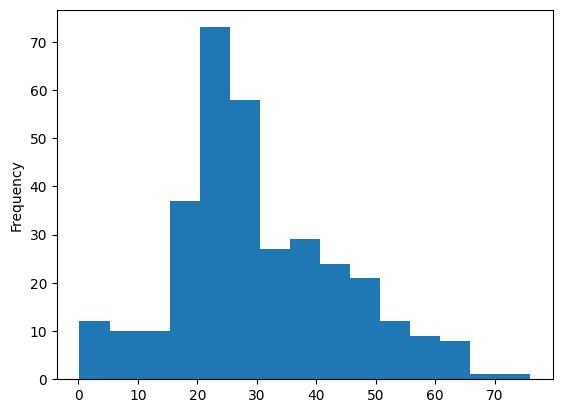

In [28]:
data["Age"].plot(kind="hist",bins=15)

In [29]:
data[(data["Age"]>0)& (data["Age"]<6)].shape[0]

12

<Axes: ylabel='Density'>

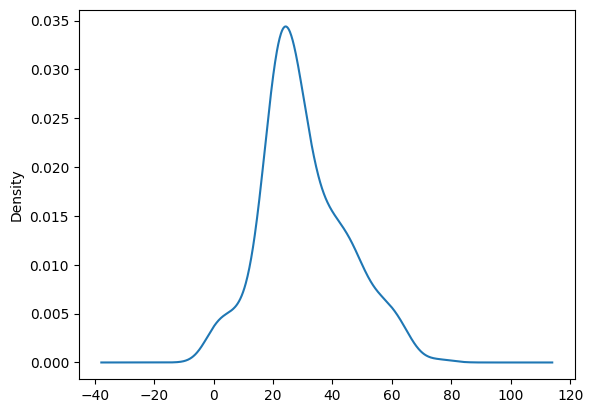

In [30]:
data["Age"].plot(kind="kde")

<Axes: >

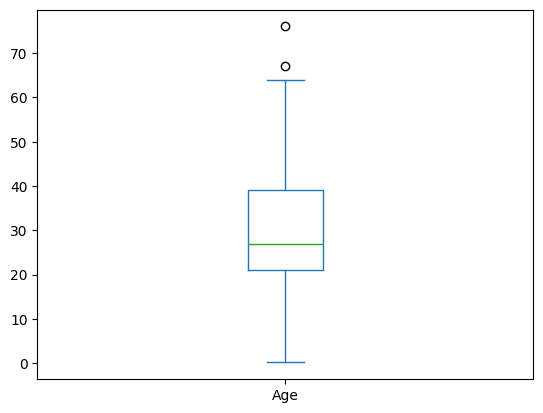

In [31]:
data["Age"].plot(kind="box")

In [32]:
data[data["Age"]>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S


# Conclussion Fare
**1-** Highly positiv skewed
**2-** Not individula fare

In [33]:
data["Fare"].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [34]:
data[data["Fare"]== 512.329200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
343,1235,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C


<Axes: ylabel='Frequency'>

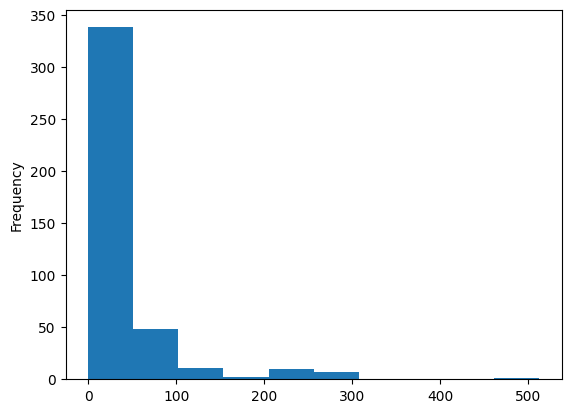

In [35]:
data["Fare"].plot(kind="hist")

In [36]:
data["Fare"].skew()

3.6872133081121405

<Axes: ylabel='Density'>

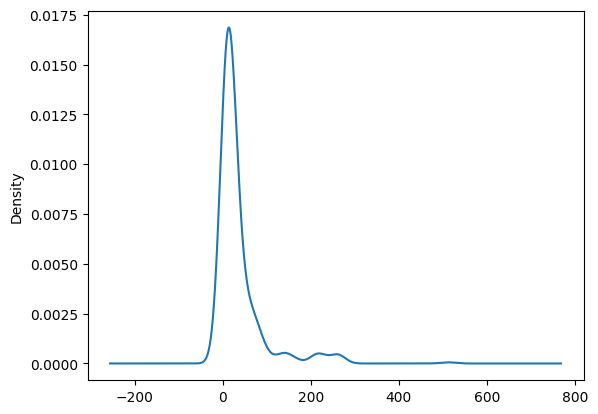

In [37]:
data["Fare"].plot(kind="kde")

<Axes: >

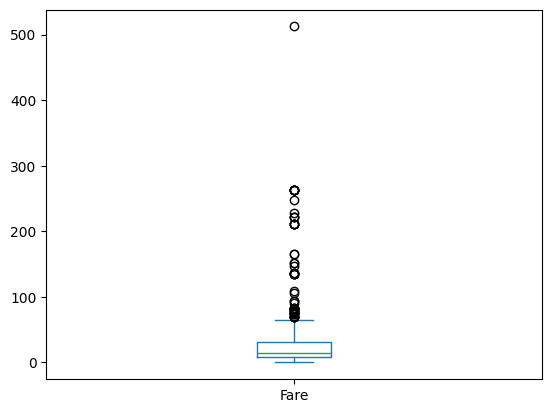

In [38]:
data["Fare"].plot(kind="box")

# Cat Col
**Survived**

**Died rate is high than survived**

In [39]:
data["Survived"].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

<Axes: xlabel='Survived'>

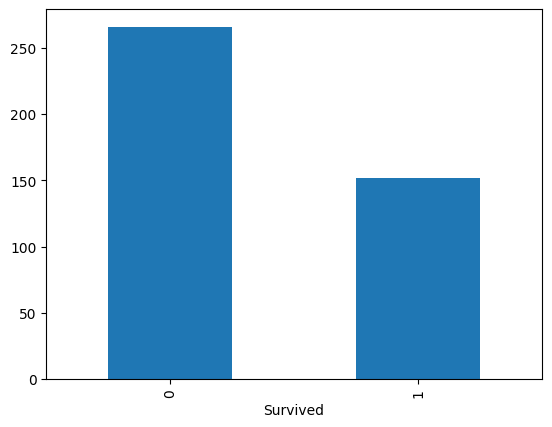

In [40]:
data["Survived"].value_counts().plot(kind="bar")

<Axes: ylabel='proportion'>

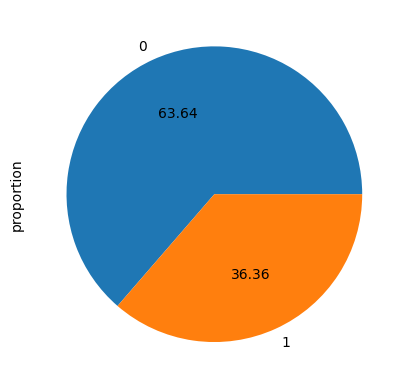

In [41]:
data["Survived"].value_counts(normalize=True).plot(kind="pie",autopct="%.2f")

In [42]:
data["Survived"].value_counts(normalize=True)

Survived
0    0.636364
1    0.363636
Name: proportion, dtype: float64

# Pclass

## Conclussion
**1-** Most of the people travel in pclass3. **2-** less mounts of people travel in pclass 2  

**3-** It is not good b/c Generally most of the people travel in pclass 1

In [43]:
data["Pclass"].value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

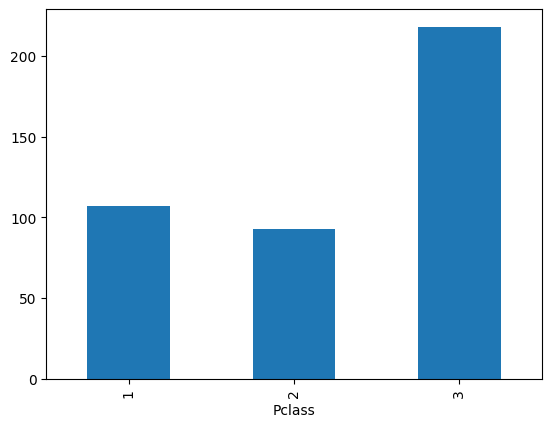

In [44]:
data["Pclass"].value_counts().sort_index().plot(kind="bar")

In [45]:
data['Pclass'].value_counts(normalize=True)

Pclass
3    0.521531
1    0.255981
2    0.222488
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

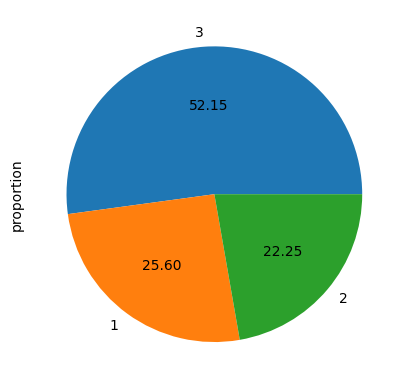

In [46]:
data['Pclass'].value_counts(normalize=True).plot(kind="pie",autopct="%.2f")

# Sex
## Conclussion
**Male Distrubtion is greater than female**

In [47]:
data["Sex"].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

<Axes: xlabel='Sex'>

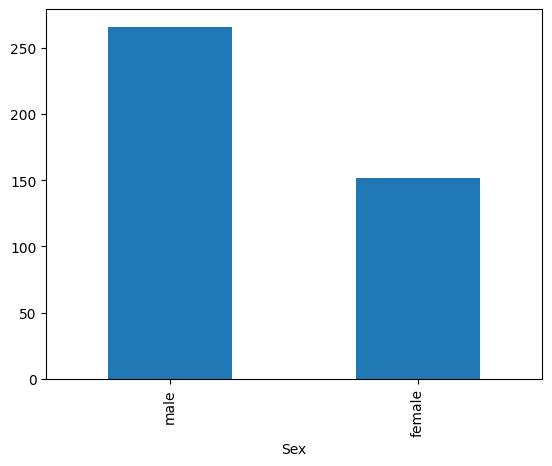

In [48]:
data["Sex"].value_counts().plot(kind="bar")

<Axes: ylabel='proportion'>

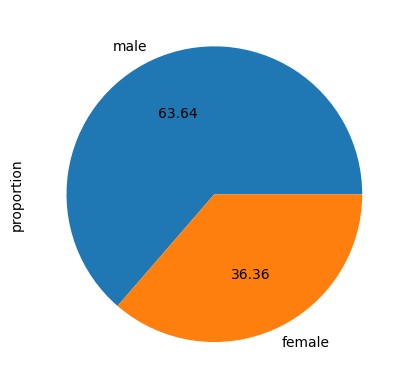

In [49]:
data["Sex"].value_counts(normalize=True).plot(kind="pie",autopct="%.2f")

# Embarked
## conclussion
**Most of the people enter in Sounthamtan**

In [50]:
data["Embarked"].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

<Axes: xlabel='Embarked'>

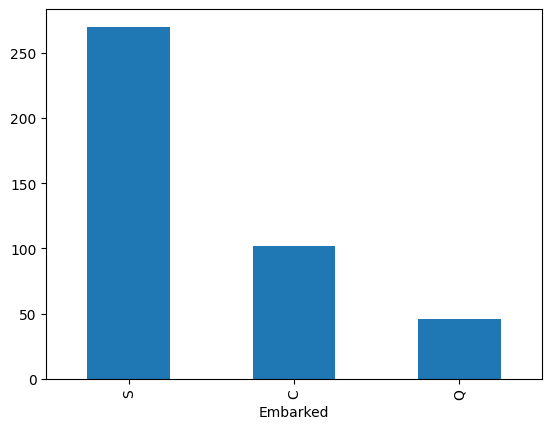

In [51]:
data["Embarked"].value_counts().plot(kind="bar")

<Axes: ylabel='proportion'>

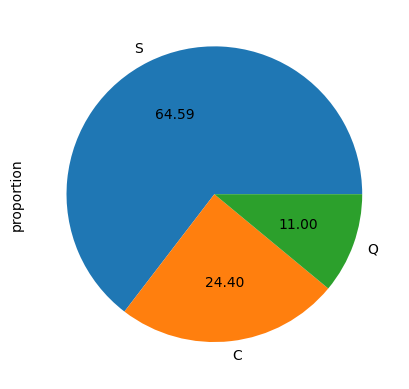

In [53]:
data["Embarked"].value_counts(normalize=True).plot(kind="pie",autopct="%.2f")

# Bivariate Analysis

## Cat to Cat 

### Survived and Pclas
## Conclussion
**1-**Most of the People Died on Pclass 3 **2-** Most of the people survived in pclass 1

In [54]:
pd.crosstab(data["Survived"],data["Pclass"])

Pclass,1,2,3
Survived,,,
0,57,63,146
1,50,30,72


Text(0.5, 1.0, 'Survived Vs Pclass')

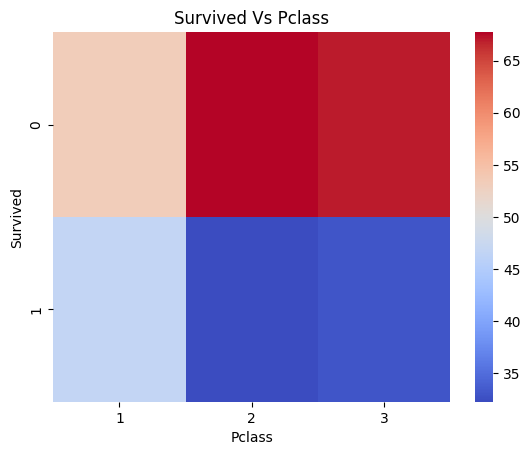

In [55]:
sns.heatmap(pd.crosstab(data["Survived"],data["Pclass"],normalize="columns")*100,cmap="coolwarm")
plt.title("Survived Vs Pclass")

<Axes: xlabel='Pclass'>

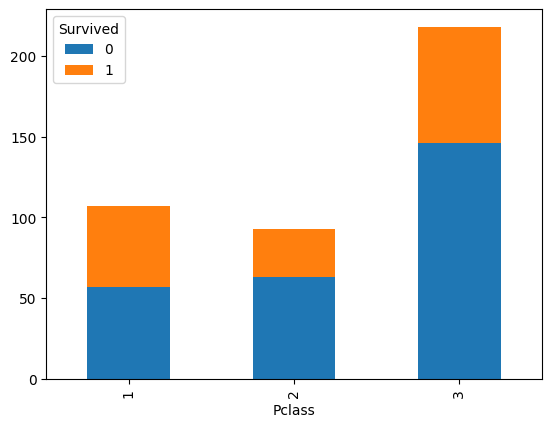

In [56]:
pd.crosstab(data["Pclass"],data["Survived"]).plot(kind="bar",stacked=True)

Text(0.5, 1.0, 'Survived vs Pclass')

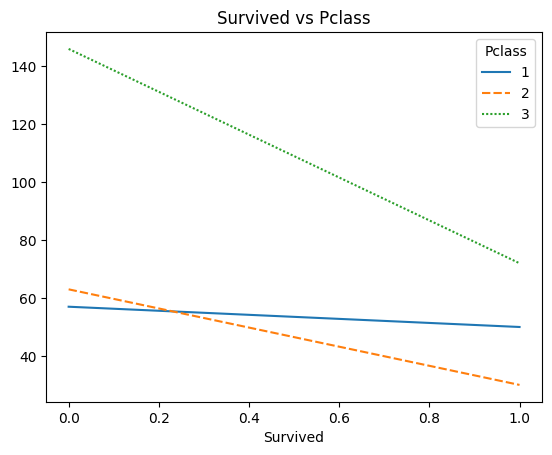

In [57]:
sns.lineplot(pd.crosstab(data["Survived"],data["Pclass"]))
plt.title("Survived vs Pclass")

# Survived vs Sex
## Conclussion

In [58]:
pd.crosstab(data["Survived"],data["Sex"])

Sex,female,male
Survived,,
0,0,266
1,152,0


Text(0.5, 1.0, 'Sex vs Survived')

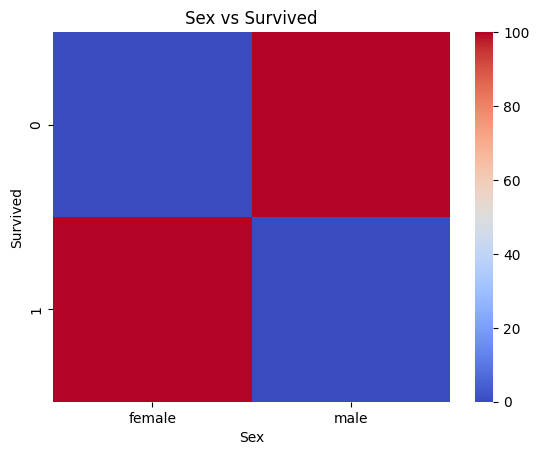

In [59]:
sns.heatmap(pd.crosstab(data["Survived"],data["Sex"],normalize='columns')*100,cmap="coolwarm")
plt.title("Sex vs Survived")

<Axes: xlabel='Survived'>

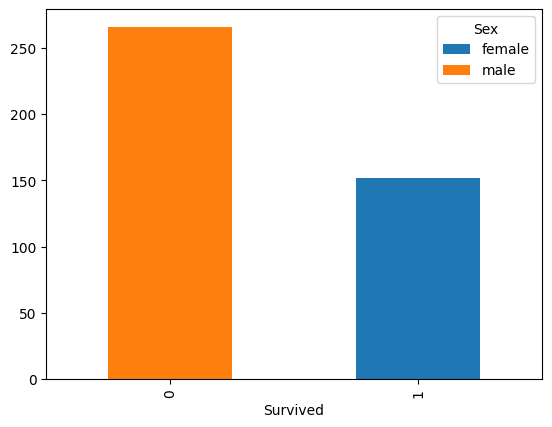

In [60]:
pd.crosstab(data["Survived"],data["Sex"]).plot(kind="bar",stacked=True)

# Survived vs Embarked
## Conclussion

In [61]:
pd.crosstab(data["Survived"],data["Embarked"],normalize="columns")*100

Embarked,C,Q,S
Survived,,,
0,60.784314,47.826087,67.407407
1,39.215686,52.173913,32.592593


<Axes: xlabel='Embarked', ylabel='Survived'>

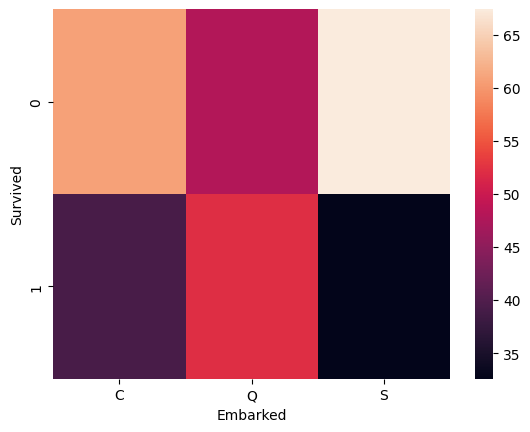

In [62]:
sns.heatmap(pd.crosstab(data["Survived"],data["Embarked"],normalize="columns")*100)

In [63]:
pd.crosstab(data["Pclass"],data["Sex"])

Sex,female,male
Pclass,,
1,50,57
2,30,63
3,72,146


Text(0.5, 1.0, 'Sex vs Pclass')

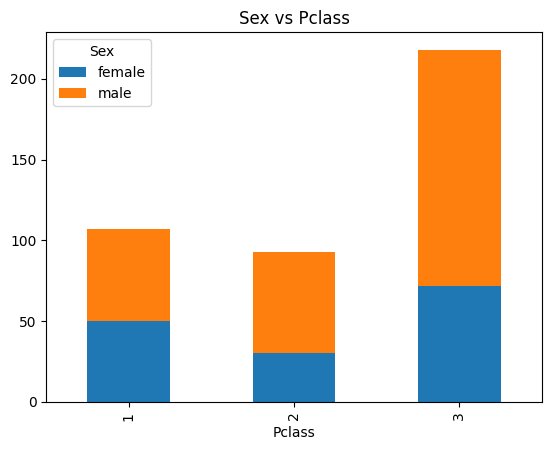

In [64]:
pd.crosstab(data["Pclass"],data["Sex"]).plot(kind="bar",stacked=True)
plt.title("Sex vs Pclass")

# Sex vs Embarked
## Conclussion

<Axes: xlabel='Embarked'>

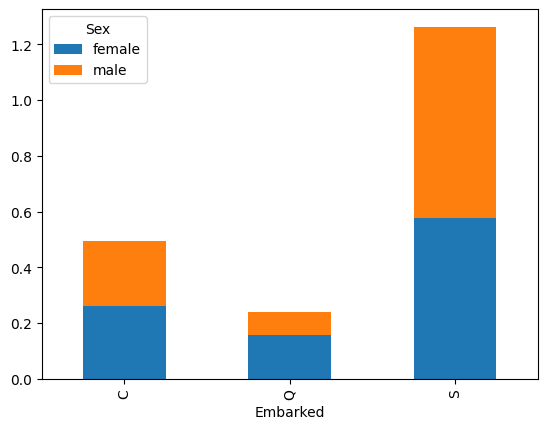

In [65]:
pd.crosstab(data["Embarked"],data["Sex"],normalize="columns").plot(kind="bar",stacked=True)

# Num-Cat
## Survived vs Age

In [66]:
data.groupby(["Survived"])["Age"].mean()

Survived
0    30.272732
1    30.272362
Name: Age, dtype: float64

# Survived Vs Fare

In [67]:
data.groupby(["Survived"])["Fare"].mean()

Survived
0    27.527877
1    49.747699
Name: Fare, dtype: float64

# Pclass vs Age

In [68]:
data.groupby(['Pclass'])["Age"].mean()

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

Text(0.5, 1.0, 'Pclass vs Age')

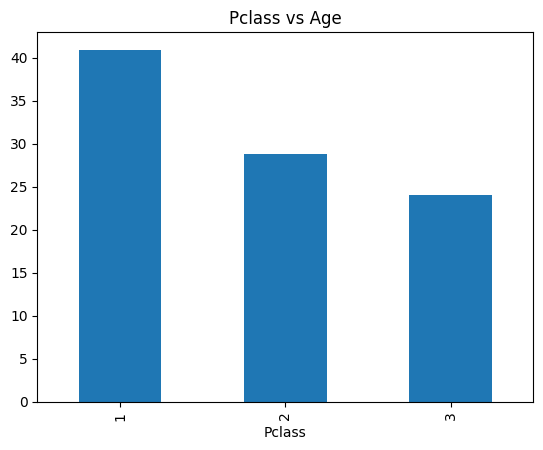

In [69]:
data.groupby(['Pclass'])["Age"].mean().plot(kind="bar")
plt.title("Pclass vs Age")

In [70]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [71]:
data.groupby(["Pclass"])["Fare"].mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

<Axes: xlabel='Pclass'>

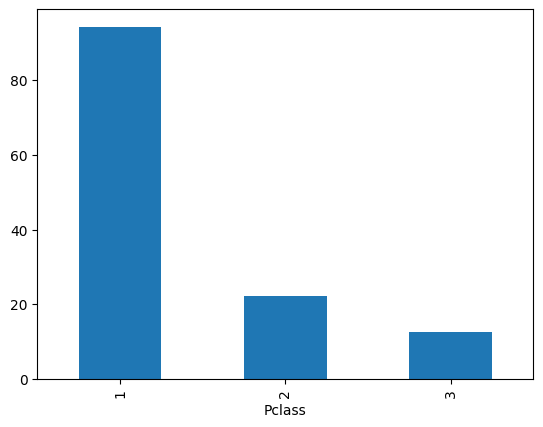

In [72]:
data.groupby(["Pclass"])["Fare"].mean().plot(kind="bar")

# Feature Engineering

In [73]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [74]:
new_df=data.copy()

In [75]:
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [76]:
# new_df["Age"].fillna(new_df["Age"].mean(),inplace=True)

In [77]:
# new_df["Age"].plot(kind="kde",label="new_df Age")
# data["Age"].plot(kind="kde",label="old_df Age")
# plt.legend()

## New Family Col

In [78]:
new_df["Family"]=new_df["SibSp"]+new_df["Parch"]+1

<Axes: ylabel='Density'>

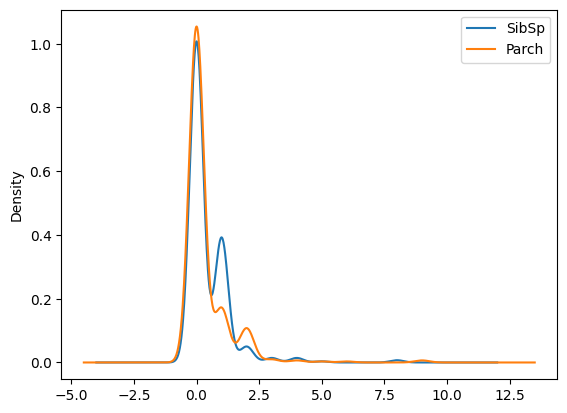

In [79]:
new_df[["SibSp","Parch"]].plot(kind="kde")

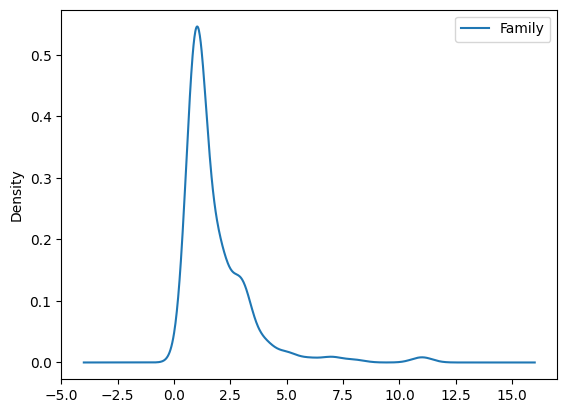

In [80]:
new_df["Family"].plot(kind="kde")
plt.legend()

In [81]:
new_df["Embarked"].isna().sum()

0

In [82]:
new_df["Embarked"].fillna(new_df["Embarked"].mode(),inplace=True)

## Set the individual fare

### We can set the inividual fare by dividing the family col

In [83]:
new_df["Individual_Fare"]=new_df["Fare"]/(new_df["Family"])

In [84]:
new_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Individual_Fare
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,7.8292
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,3.5000
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,9.6875


In [85]:
new_df[["Individual_Fare","Fare"]]

,Individual_Fare,Fare
0,7.829200,7.8292
1,3.500000,7.0000
2,9.687500,9.6875
3,8.662500,8.6625
4,4.095833,12.2875
...,...,...
413,8.050000,8.0500
414,108.900000,108.9000
415,7.250000,7.2500
416,8.050000,8.0500


<Axes: ylabel='Density'>

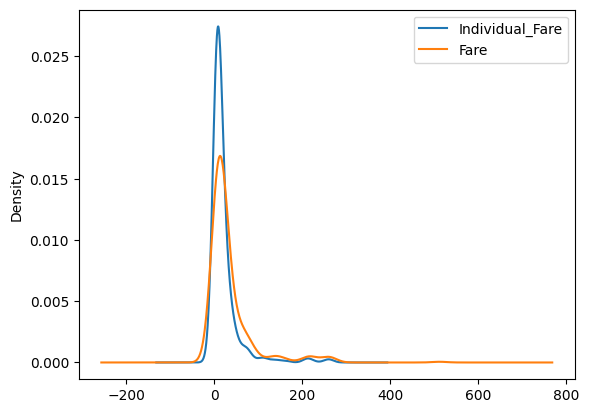

In [86]:
new_df[["Individual_Fare","Fare"]].plot(kind="kde")

**1-** Missing Values in age col **2-** Combine Sib & parch and make a family col **3-** Ticket are in messy form **4-** Missing values in cabin col **5-** Cabin are also  in dirty form **7-** Missing values in Embarked col

## Cabin Missing Values

In [87]:
new_df["Cabin"].isna().sum()

327

## Make a  Colum that contanin the family title

In [88]:
new_df["Family_title"]=new_df["Name"].str.split(",").str.get(0)

## Family col Distrubution

In [89]:
new_df["Family"].value_counts()

Family
1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: count, dtype: int64

Text(0.5, 1.0, 'Family')

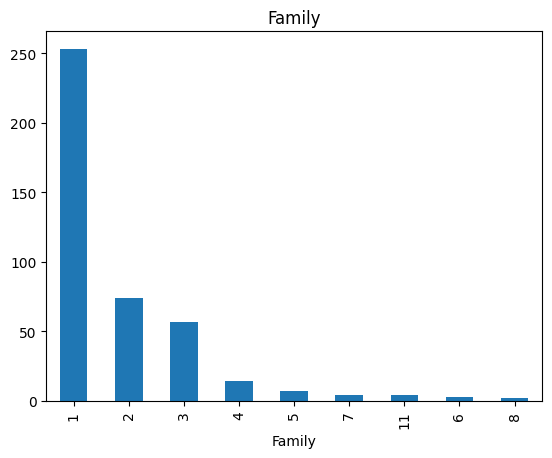

In [90]:
new_df["Family"].value_counts().plot(kind="bar")
plt.title("Family")

In [91]:
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Individual_Fare,Family_title
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,7.829200,Kelly
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,3.500000,Wilkes
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,9.687500,Myles
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,8.662500,Wirz
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,4.095833,Hirvonen


In [92]:
def family_size(nbr):
    if(nbr==1):
        return "Alone"
    elif(nbr<5):
        return "small"
    else:
        return  "large"

In [93]:
new_df["Family_size"]=new_df["Family"].apply(family_size)

# Drop unecessary col

In [94]:
new_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Individual_Fare,Family_title,Family_size
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,7.8292,Kelly,Alone
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,3.5000,Wilkes,small


# Family Size vs Survived
## Conclussion
**1-** Died rate is high in Alone and large
**2-** Survived Rate is high in small family

In [95]:
pd.crosstab(new_df["Family_size"],new_df["Survived"])

Survived,0,1
Family_size,,
Alone,185,68
large,12,8
small,69,76


Text(0.5, 1.0, 'Survived vs Family_Size')

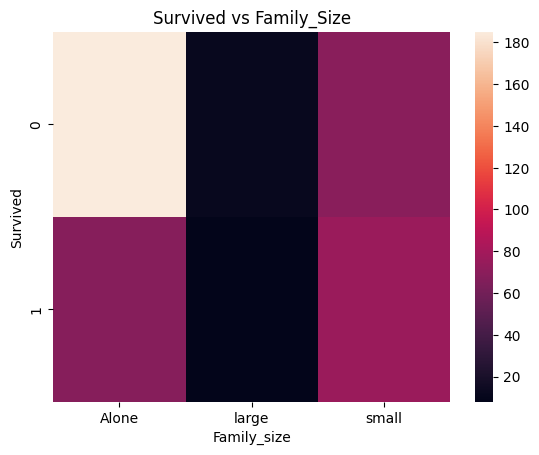

In [96]:
sns.heatmap(pd.crosstab(new_df["Survived"],new_df["Family_size"]))
plt.title("Survived vs Family_Size")

In [97]:
new_df.drop(columns=["Name","SibSp","Parch","Fare","Cabin"],inplace=True)

In [98]:
new_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Embarked,Family,Individual_Fare,Family_title,Family_size
0,892,0,3,male,34.5,330911,Q,1,7.829200,Kelly,Alone
1,893,1,3,female,47.0,363272,S,2,3.500000,Wilkes,small
2,894,0,2,male,62.0,240276,Q,1,9.687500,Myles,Alone
3,895,0,3,male,27.0,315154,S,1,8.662500,Wirz,Alone
4,896,1,3,female,22.0,3101298,S,3,4.095833,Hirvonen,small


In [99]:
new_df.drop(columns=["PassengerId","Ticket"],inplace=True)

In [100]:
new_df["Embarked"].mode()

0    S
Name: Embarked, dtype: category
Categories (3, object): ['C', 'Q', 'S']

In [101]:
new_df["Embarked"].fillna("S",inplace=True)

In [102]:
new_df.isnull().sum()

Survived            0
Pclass              0
Sex                 0
Age                86
Embarked            0
Family              0
Individual_Fare     1
Family_title        0
Family_size         0
dtype: int64

In [103]:
data["Embarked"].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [104]:
new_df["Individual_Fare"].apply(np.sqrt).skew()

2.539725748643594

In [105]:
new_df["Sur_Name"]=data["Name"].str.split(",").str.get(1).str.split().str.get(0)

In [106]:
new_df["Sur_Name"].value_counts().skew()

2.2264456417402467

<Axes: xlabel='Sur_Name', ylabel='Survived'>

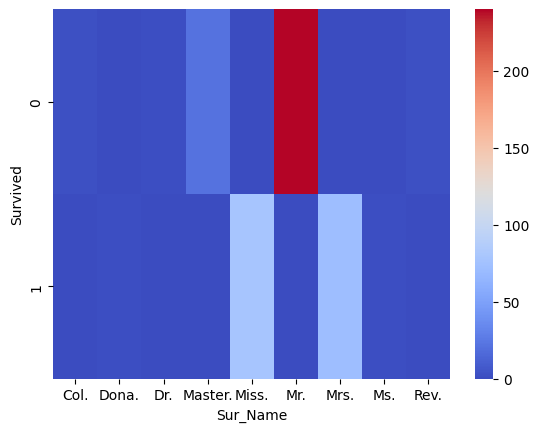

In [107]:
sns.heatmap(pd.crosstab(new_df["Survived"],new_df["Sur_Name"]),cmap="coolwarm")

In [108]:
pd.crosstab(new_df["Survived"],new_df["Sur_Name"])

Sur_Name,Col.,Dona.,Dr.,Master.,Miss.,Mr.,Mrs.,Ms.,Rev.
Survived,,,,,,,,,
0,2,0,1,21,0,240,0,0,2
1,0,1,0,0,78,0,72,1,0


# build a model

In [109]:
new_df.head()

,Survived,Pclass,Sex,Age,Embarked,Family,Individual_Fare,Family_title,Family_size,Sur_Name
0,0,3,male,34.5,Q,1,7.829200,Kelly,Alone,Mr.
1,1,3,female,47.0,S,2,3.500000,Wilkes,small,Mrs.
2,0,2,male,62.0,Q,1,9.687500,Myles,Alone,Mr.
3,0,3,male,27.0,S,1,8.662500,Wirz,Alone,Mr.
4,1,3,female,22.0,S,3,4.095833,Hirvonen,small,Mrs.


In [110]:
new_df["Family"]=new_df["Family"].astype("int32")

In [111]:
new_df["Age"].fillna(new_df["Age"].mean(),inplace=True)

In [112]:
new_df.isnull().sum()
new_df.dropna(inplace=True)

# Saperate the num an dCat col

In [113]:
num_col=['Age',"Individual_Fare","Pclass","Family"]
cat_col=new_df.drop(columns=["Survived"]).columns.difference(num_col)

In [114]:
new_df[cat_col].info()
new_df[num_col].info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Embarked      417 non-null    category
 1   Family_size   417 non-null    object  
 2   Family_title  417 non-null    object  
 3   Sex           417 non-null    category
 4   Sur_Name      417 non-null    object  
dtypes: category(2), object(3)
memory usage: 14.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              417 non-null    float64
 1   Individual_Fare  417 non-null    float64
 2   Pclass           417 non-null    int16  
 3   Family           417 non-null    int32  
dtypes: float64(2), int16(1), int32(1)
memory usage: 12.2 KB


In [115]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder,FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

# Saperate the feature and label

In [116]:
feature=new_df.drop(columns=["Survived"])
label=new_df["Survived"]

In [117]:
x_train,x_test,y_train,y_test=train_test_split(feature,label,test_size=0.2,random_state=2)

In [118]:
x_train.isnull().sum()

Pclass             0
Sex                0
Age                0
Embarked           0
Family             0
Individual_Fare    0
Family_title       0
Family_size        0
Sur_Name           0
dtype: int64

In [119]:
y_test.isnull().sum()

0

In [120]:
new_df[num_col].head(2)

,Age,Individual_Fare,Pclass,Family
0,34.5,7.8292,3,1
1,47.0,3.5000,3,2


# Build a Pipe line

## Impute the missing value

In [121]:
# impute=KNNImputer(n_neighbors=3
# new_df["Age"].fillna(new_df["Age"].mean(),inplace=True)

In [122]:
num_transform=Pipeline(steps=[
#     ("impute",num_col[0]),
    ("Scale",StandardScaler())
])

In [124]:
cat_transform=Pipeline(steps=[
    ("encode",OneHotEncoder(handle_unknown="ignore"))
])

# Build a Transformer

In [125]:
#  (1/√(2πσ2)) (e[-(x-μ)^2]/2σ^2).
def normal_ditrubution(nbr):
    return (1/(np.std(nbr)*(np.sqrt(2*np.pi))))*(np.exp((-0.5)*(nbr-np.mean(nbr)/np.std(nbr))**2))

In [126]:
transformer=ColumnTransformer(transformers=[
#     ("impute",KNNImputer(n_neighbors=5)),
    ("scale",num_transform,num_col),
    ("Age_Fare_Transform",FunctionTransformer(np.log1p),num_col[0:2]),
    ("Remainig_Transform",FunctionTransformer(normal_ditrubution),num_col[2:]),
    ("Ohe",cat_transform,cat_col)
],remainder="passthrough")

# Import Model 

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# model=LogisticRegression()
# model =DecisionTreeClassifier()
model=RandomForestClassifier()

## use pipe lines

In [128]:
pipe=Pipeline([
    ("transform",transformer),
    ("model",model)
])

In [129]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale',
                                                  Pipeline(steps=[('Scale',
                                                                   StandardScaler())]),
                                                  ['Age', 'Individual_Fare',
                                                   'Pclass', 'Family']),
                                                 ('Age_Fare_Transform',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['Age', 'Individual_Fare']),
                                                 ('Remainig_Transform',
                                                  FunctionTransformer(func=<function normal_ditrubution at 0x0000018A6F3094E0>),
                                                  ['Pclass', 'Family']),
                                                 ('Ohe',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Embarked', 'Family_size', 'Family_title', 'Sex', 'Sur_Name'], dtype='object'))])),
                ('model', RandomForestClassifier())])

# Make a prediction

In [130]:
pred=pipe.predict(x_test)

# Check the Accuracy

In [131]:
from sklearn.metrics import accuracy_score,mean_squared_error

In [132]:
error=mean_squared_error(y_test,pred)

In [133]:
error

0.0

In [148]:
accuracy=accuracy_score(y_test,pred)

In [149]:
print("Accuracy: ",accuracy)

Accuracy:  1.0


# Check the cross val score

In [150]:
from sklearn.model_selection import cross_val_score

In [151]:
score=cross_val_score(pipe,x_train,y_train,cv=5)

In [154]:
score.mean()

1.0

In [155]:
new_df.to_csv("titanic_cleaned.csv")

In [156]:
new_df.head()

,Survived,Pclass,Sex,Age,Embarked,Family,Individual_Fare,Family_title,Family_size,Sur_Name
0,0,3,male,34.5,Q,1,7.829200,Kelly,Alone,Mr.
1,1,3,female,47.0,S,2,3.500000,Wilkes,small,Mrs.
2,0,2,male,62.0,Q,1,9.687500,Myles,Alone,Mr.
3,0,3,male,27.0,S,1,8.662500,Wirz,Alone,Mr.
4,1,3,female,22.0,S,3,4.095833,Hirvonen,small,Mrs.


In [158]:
# new_df.to_csv("Titanic_data.cvs",index=False)

In [177]:
d=[
    {
        'price_data': {
            'currency': 'PKR',
            'product_data': {
                'name': 'Watch',
                'description': 'Quantity: 2',
                'images': ['http://127.0.0.1:8000/media/images/time.jpeg']
            },
            'unit_amount': 324300
        },
        'quantity': 2
    },
    {
        'price_data': {
            'currency': 'PKR',
            'product_data': {
                'name': 'Car',
                'description': 'Quantity: 1',  # Add the missing comma here
                'images': ['http://127.0.0.1:8000/media/images/car_KYFUs4R.jpeg']
            },
            'unit_amount': 50000000
        },
        'quantity': 1
    }
]


In [179]:
d[0]

{'price_data': {'currency': 'PKR',
  'product_data': {'name': 'Watch',
   'description': 'Quantity: 2',
   'images': ['http://127.0.0.1:8000/media/images/time.jpeg']},
  'unit_amount': 324300},
 'quantity': 2}

In [186]:
cur=d[0]["price_data"]["currency"]

In [191]:
name=d[0]["price_data"]["product_data"]["name"]

In [195]:
qty=d[0]["price_data"]["product_data"]["description"]

In [200]:
image=d[0]["price_data"]["product_data"]["images"][0]

In [213]:
for i in d:
    print(i["price_data"]["currency"])
    print(i["price_data"]["product_data"]["name"])
    print(i["price_data"]["product_data"]["description"])
    print(i["price_data"]["product_data"]["images"][0])
    print()

PKR
Watch
Quantity: 2
http://127.0.0.1:8000/media/images/time.jpeg

PKR
Car
Quantity: 1
http://127.0.0.1:8000/media/images/car_KYFUs4R.jpeg

